# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

588


In [3]:

cities_df = pd.DataFrame(columns = ['City Name', 'City ID', 'Latitude', 'Longitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed'])
cities_df['City Name']= cities
cities_df['City ID']=''
cities_df['Latitude']=''
cities_df['Longitude']=''
cities_df['Max Temperature']=''
cities_df['Humidity']=''
cities_df['Cloudiness']=''
cities_df['Wind Speed']=''
cities_df.head()

,City Name,City ID,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,rypefjord,,,,,,,
1,tiksi,,,,,,,
2,ventosa,,,,,,,
3,georgetown,,,,,,,
4,maloshuyka,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

i = 0

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    cities_response = requests.get(query_url)
    cities_json = cities_response.json()
    
    
    try:
        cityName = cities_json["name"]
        cityID = cities_json["id"]
        print(f"City Name: {cityName} | ID: {cityID}")
        cities_df.iloc[i,1] = cityID
        cities_df.iloc[i,2] = cities_json["coord"]["lat"]
        cities_df.iloc[i,3] = cities_json["coord"]["lon"]
        cities_df.iloc[i,4] = cities_json["main"]["temp_max"]
        cities_df.iloc[i,5] = cities_json["main"]["humidity"]
        cities_df.iloc[i,6] = cities_json["clouds"]["all"]
        cities_df.iloc[i,7] = cities_json["wind"]["speed"]        

    except (KeyError):
        print("Data not available. Skipping...")
        
    time.sleep(1)
    
    i+=1

Beginning Data Retrieval
-------------------------------
City Name: Rypefjord | ID: 847634
City Name: Tiksi | ID: 2015306
City Name: Ventosa | ID: 2261732
City Name: George Town | ID: 1735106
Data not available. Skipping...
City Name: Mataura | ID: 6201424
Data not available. Skipping...
City Name: Chapleau | ID: 5919915
City Name: Hermanus | ID: 3366880
City Name: Cabo San Lucas | ID: 3985710
City Name: Tuktoyaktuk | ID: 6170031
City Name: Leningradskiy | ID: 2123814
City Name: Jamestown | ID: 5122534
City Name: Nikolskoye | ID: 546105
City Name: Qaanaaq | ID: 3831208
City Name: East London | ID: 1006984
City Name: Airai | ID: 1651810
City Name: Ixtapa | ID: 4004293
City Name: Busselton | ID: 2075265
City Name: Hambantota | ID: 1244926
Data not available. Skipping...
City Name: Shepsi | ID: 494846
Data not available. Skipping...
City Name: Necochea | ID: 3430443
City Name: Port Elizabeth | ID: 964420
City Name: Cape Town | ID: 3369157
City Name: Mar del Plata | ID: 3430863
City Name: 

City Name: Karakol | ID: 1528121
City Name: Chifeng | ID: 2038067
City Name: Panjab | ID: 1131162
City Name: Ulladulla | ID: 2145554
City Name: Bethel | ID: 5282297
City Name: Yangi Marg`ilon | ID: 1513491
City Name: Labuan | ID: 1733782
Data not available. Skipping...
City Name: Marang | ID: 1734715
City Name: Codrington | ID: 2171099
City Name: Bosaso | ID: 64013
City Name: Byron Bay | ID: 2172880
City Name: Langsa | ID: 1214724
Data not available. Skipping...
City Name: Sibolga | ID: 1213855
City Name: Beringovskiy | ID: 2126710
City Name: Esperance | ID: 2071860
City Name: Narsaq | ID: 3421719
City Name: Kahului | ID: 5847411
Data not available. Skipping...
City Name: Chimbote | ID: 3698304
City Name: Coahuayana Viejo | ID: 4013679
City Name: Balagansk | ID: 2027198
City Name: Progreso | ID: 3521108
City Name: Labuhan | ID: 8079926
City Name: Gladstone | ID: 2165478
City Name: Virginia Beach | ID: 4791259
City Name: Moroto | ID: 229112
City Name: Mkokotoni | ID: 153585
City Name: C

City Name: Vanavara | ID: 2013727
City Name: Siparia | ID: 3573681
City Name: Poim | ID: 507643
City Name: Wanning | ID: 1791779
City Name: Mana | ID: 3381041
City Name: Kortkeros | ID: 544397
City Name: Nouadhibou | ID: 2377457
City Name: Clarence Town | ID: 2171465
City Name: Gazli | ID: 1513990
City Name: Haverfordwest | ID: 2647311
City Name: Arlit | ID: 2447513
City Name: Goderich | ID: 5962442
City Name: Ternate | ID: 1624041
City Name: Jalingo | ID: 2336589
City Name: Buraidah | ID: 107304
City Name: Salamanca | ID: 3111107
City Name: Faanui | ID: 4034551
City Name: Ugoofaaru | ID: 1337619
City Name: Portland | ID: 5746545
City Name: Bandarbeyla | ID: 64814
Data not available. Skipping...
City Name: Zhuhai | ID: 1790437
City Name: Oussouye | ID: 2246901
City Name: Richards Bay | ID: 962367
City Name: Domoni | ID: 921906
City Name: Alyangula | ID: 2079582
City Name: Porangatu | ID: 3453014
City Name: Phangnga | ID: 1151464
City Name: Abalak | ID: 1512223
City Name: Owando | ID: 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df[["City ID", "Latitude", "Longitude", "Max Temperature", "Humidity", "Cloudiness", "Wind Speed"]] = \
    cities_df[["City ID", "Latitude", "Longitude", "Max Temperature", "Humidity", "Cloudiness", "Wind Speed"]].apply(pd.to_numeric)

cities_df = cities_df.dropna()


In [6]:
cities_df.to_csv(output_data_file, index=False)
cities_df.head()

,City Name,City ID,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,rypefjord,847634.0,70.63,23.67,19.40,73.0,100.0,32.21
1,tiksi,2015306.0,71.69,128.87,-26.37,85.0,0.0,5.39
2,ventosa,2261732.0,39.13,-9.08,60.01,93.0,20.0,2.24
3,georgetown,1735106.0,5.41,100.34,80.60,74.0,20.0,3.36
5,mataura,6201424.0,-46.19,168.86,59.00,91.0,100.0,8.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

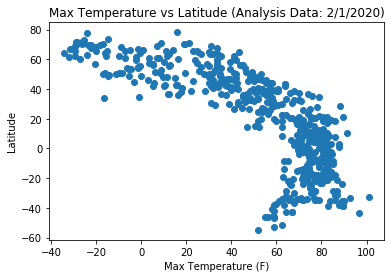

In [7]:
x_axis = cities_df["Max Temperature"]
y_axis = cities_df["Latitude"]

plt.scatter(x_axis, y_axis)
plt.title("Max Temperature vs Latitude (Analysis Data: 2/1/2020)")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.savefig("output_data/temp_vs_lat")

In this chart, we can see that max city temperature is higher the closer you get to the equator at 0 Latitude and lower as you get closer to the north pole getting down to -40 degrees. The trend moving from the equator to the south pole is much less promounced, staying abotu 45 degrees. 

#### Latitude vs. Humidity Plot

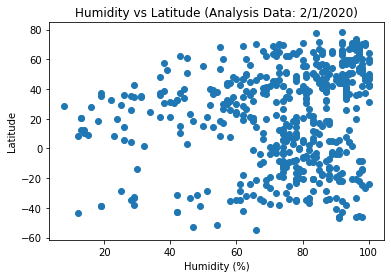

In [8]:
x_axis = cities_df["Humidity"]
y_axis = cities_df["Latitude"]

plt.scatter(x_axis, y_axis)
plt.title("Humidity vs Latitude (Analysis Data: 2/1/2020)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.savefig("output_data/humidity_vs_lat")

In this chart, we can see that humidity is pretty evenly despersed regardless of latitude. There seems to be a more concentrated of cities with humidity higher than 50 percent.

#### Latitude vs. Cloudiness Plot

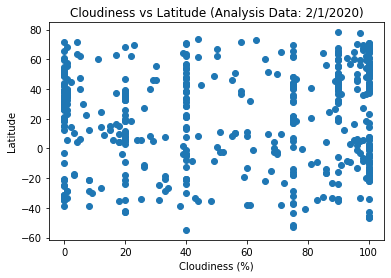

In [9]:
x_axis = cities_df["Cloudiness"]
y_axis = cities_df["Latitude"]

plt.scatter(x_axis, y_axis)
plt.title("Cloudiness vs Latitude (Analysis Data: 2/1/2020)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.savefig("output_data/cloudiness_vs_lat")

In this chart, we can see that cloudiness is fairly evenly dispersed regardless of latitude. Most values seem to fall around 0% and 100%, with noteworthy clusters at 77%, 40% 95% and 20%.  A bubble chart with latitude vs longitude and the % cloudiness dictating bubble size might be more helpful to understand this trend. 

#### Latitude vs. Wind Speed Plot

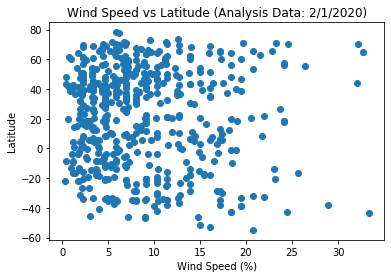

In [10]:
x_axis = cities_df["Wind Speed"]
y_axis = cities_df["Latitude"]

plt.scatter(x_axis, y_axis)
plt.title("Wind Speed vs Latitude (Analysis Data: 2/1/2020)")
plt.xlabel("Wind Speed (%)")
plt.ylabel("Latitude")
plt.savefig("output_data/windspeed_vs_lat")

In this chart, we can see that windspeed is fairly evenly dispersed regardless of latitude. Most cities fall between 0 and 15 mph windspeeds with a smaller cluster values falling generally between 15 and 30 mph. There seems to be a few outlier values between 30 and 40 mph. It would be interesting to see what city these readings came from and if there was a noteworthy weather event. 

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression